If you want to visualise the learning process, please download this notebook and run in your jupyter

## Intro

In machine learning, perceptron is an algorithm for supervised learning of binary classifiers. 
A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class (for example if height = 1.86m and weight = 85 kg is a man or woman).  
It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector

Another example: by size of the animal and its rate of domestication decide whatever it's a cat or a dog.<br>
## Perceptron learning
Perceptron learning is a process of tunning perceptron's parameters each time we give him a new data.<br>
In brief, perceptron tries to "calibrate" himself on the given data set, to describe it as best as possible without misclassification.<br>
A diagram showing a perceptron learning (updating its linear boundary as we give it more examples)

< img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Perceptron_example.svg" width=500/>


## Let's practice
First, let me quickly import necessary modules:

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm

random.seed(42) # itinial state of random variable generator (to reproduce the same results)
%matplotlib inline

Ok, cool. Now, imagine that we are blind, we like apples and we hate pears and we have some tools to measure the <font color = 'orange'>yellowness </font>and __symmetry__ of fruit.<br>
let's write our perceptron who recognizes apples and pears by two parameters we can measure.<br>
Suppose by bitter mistakes we got already some small data set (data.csv file):


matrix n x m $1000 \times 3$, columns are:  fruit yellowness (float), fruit symmetry(float) and fruit class(bool) 0 if apple, 1 if pear.

In [2]:
data = np.loadtxt("data.csv", delimiter=",")
pears = data[:, 2] == 1
apples = np.logical_not(pears)

plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

OSError: data.csv not found.

# Perceptron
So perceptron itself is simply defined by:
- perceptron weights
- sumator function
- activation function

__What are perceptron weights?__
Each weight is a significance rate of corresponding data input.
(for example we might say that to classify the fruit, symmetry is more important than yellowness, so weight_for_symmetry should be greater than weight_for_yellowness)

__What is sumator function?__
The main goal of summator function if to give a one number. It's an intermediate step and this function should be always used as argument to activation function. 

__What is activation function?__
The main goal of activation function is to give an answer, to take the final decision. <br>
In our case activation function should return 0 or 1 (apple or pear). But further, we may expect to receive the probability between 0 and 1, or some value in specific range. 

__What should I set at inception?__
While weights will be calibrated on data set, you should just set the initial weights, for example all zeros.<br>
So as a perceptron creator, you have to define sumator and activation functions.<br>
The good and universal choice of sumator function is a simple dot product (a sum of input examples each weighted by significance rate)<br>
Finally, activation function is the central concept. It depends on what you expect from perceptron. In our simple case (apple or pear?) we expect to get the answer 0 or 1. So the good choice could be indicator function.

__What is the training rule?__ 
It could take some time to explain this concept.<br> Looking at image above, perceptron try to find the straight line that perfectly separate the apples from the pears.
Without technical details the rule is:
- if perceptron guess the real (a posteriori) asnwer we do nothing
- if perceptron says it's apple but in fact it's pear, we add the example to current weights
- if perceptron says it's pear but in fact it's apple, we substract the example from current weights.

When I first heard this, for me it was really weird why we add or substract the examples from current weights.
But if you find some time to think about, you will see that it works and works pretty well. There is even a theorem which states that doing this way we are sure to find a solution in a limited number of steps

In [3]:
class Perceptron:

    def __init__(self, w, b):
        """
        Initialization of perceptron.
        w - vector of size (m, 1), where m - number of characteristics
        b - scalar
        """
        
        self.w = w
        self.b = b

    def perceptron_answer(self, single_input):
        """
        Perceptron's answer to a single vector input.
        single_input - vector size (m, 1).
        Return: 0 or 1
        """
        
        result = 0
        for i in range(self.w.size):
            result += self.w[i] * single_input[i]
        result+=self.b
        return 1 if result>0 else 0

    def vectorized_perceptron_asnwer(self, input_matrix):
        """
        Perceptron's answers to a input matrix.
        input_matrix - matrix with input examples (n, m), each line - specific example,
        n - # examples, m - # characteristics
        Return: vector (n, 1) with answers 0 or 1
        """
    
        sumators = input_matrix.dot(self.w)
        activations = np.int64(sumators > 0)
        return activations

    
    def train_on_single_example(self, example, y):
        """
        Update the perceptron's weights on new example.
        example vector (m, 1) 
        y prior answer 0 or 1,
        Return: error info: 0 or 1
        0 - perceptron was right
        1 - wrong classificatino
        """

        error = y - self.perceptron_answer(example)
        self.w = self.w + error*example
        self.b = self.b + error

        return error

### Is vectorization is so important in Python?
You can notice that I defined two functions that do the same.<br>
The first one uses the simple for-loop and the 2nd one dot product.<br>
Let's see the time performance of basic python loops versus matrix vectorization.


In [4]:
def create_perceptron(m):
    """random perceptron"""
    w = np.random.random((m, 1))
    return Perceptron(w, 1)

In [5]:
def test_time_perf(n, m, ):
    """
    Return time performance for plain and vectorized methods. 
    """
    
    p = create_perceptron(m)
    input_m = np.random.random_sample((n, m))
    
    start = time.perf_counter()
    vec = p.vectorized_perceptron_asnwer(input_m)
    end = time.perf_counter()
    vector_time = end - start
    
    start = time.perf_counter()
    for i in range(0, n):
        p.perceptron_answer(input_m[i]) 
    end = time.perf_counter()
    plain_time = end - start

    return [vector_time, plain_time]

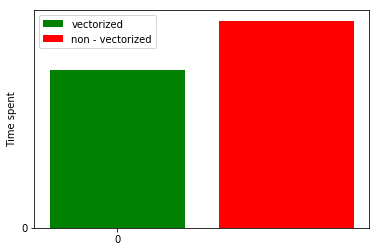

In [6]:
def mean_execution_time(n, m, trials=100):
    """average execution time for perceptron_answer and vectorized_perceptron_asnwer for trials tests"""
    
    return np.array([test_time_perf(m, n) for _ in range(trials)]).mean(axis=0)

def plot_mean_execution_time(n, m):
    """plots average execution time for perceptron_answer and vectorized_perceptron_asnwer"""
    
    mean_vectorized, mean_plain = mean_execution_time(int(n), int(m))
    p1 = plt.bar([0], mean_vectorized,  color='g')
    p2 = plt.bar([1], mean_plain, color='r')

    plt.ylabel("Time spent")
    plt.yticks(np.arange(0, mean_plain))

    plt.xticks(range(0,1))
    plt.legend(("vectorized","non - vectorized"))

    plt.show()

interact(plot_mean_execution_time, 
            n=RadioButtons(options=["1", "10", "100"]),
            m=RadioButtons(options=["1", "10", "100"], separator=" "));

Wow, looks great! The more data we have, the more impressive vectore performance becomes

## Perceptron learning
Before I defined method __train_on_single_example__. Now we want to train on the whole data set.<br>
The idea is simple: we pass trough input matrix updating the weights again and again until the perceptron can perfectly classify each example or until we reach 1M steps.

In [7]:
def train_until_convergence(self, input_matrix, y, max_steps=1e8):
        """
        input_matrix - matrix (n, m),
        y - vector with correct answers (n, 1) (y[i] - correct answer on example input_matrix[i]),
        max_steps - step limit for algorithm. 
        It applies train_on_single_example, until perceptron stops making mistakes or max_steps is reached 
        """
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                example = example.reshape((example.size, 1))
                error = self.train_on_single_example(example, answer)
                errors += int(error)  # int(True) = 1, int(False) = 0
                
Perceptron.train_until_convergence = train_until_convergence # this syntax adds defined below method to my class

## Learning visualization

Let's write some code to vasualise the dynamic of perceptron learning. 

In [8]:
def plot_line(coefs):
    """
    draws a dividing line, corresponding to the weights passed to coefs = (weights, bias), 
    where weights - ndarray of size (2, 1), bias - scalar
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [9]:
def step_by_step_weights(p, input_matrix, y, max_steps=1e6):
    """
    learn the perceptron sequentially on each line of input data
    returns updated weights each time they change
    p - object of class Perceptron
    """
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error  
            if error:  # we update the position of line just when it is changed
                yield p.w, p.b
                
    for _ in range(20): yield p.w, p.b

In [10]:
%matplotlib nbagg

np.random.seed(1)
fig = plt.figure()
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = "red", marker=".", label="Apples")
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = "green", marker=".", label="Pears")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
line, = plt.plot([], [], color="black", linewidth=2)  # create a line, which will show the separation boundary

from matplotlib.animation import FuncAnimation

perceptron_for_weights_line = create_perceptron(2)  # create a perceptron of the desired dimension with random weights

from functools import partial
weights_ani = partial(
    step_by_step_weights, p=perceptron_for_weights_line, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis]
) 

ani = FuncAnimation(fig, func=plot_line, frames=weights_ani, blit=False, interval=10, repeat=True)

## If you see nothing, try to relaunch this cell 4-5 times
## don't forget to stop animation (buttom "turn off" in the upper right corner)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "c:\users\mkapchenko\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "c:\users\mkapchenko\appdata\local\programs\python\python37\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


Wow, great! After some time, the perceptron have found the correct straigh line.<br>
It's important to note that the number of incorrectly classified examples is not always reduced through learning.<br>
Let's check it

In [11]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    trains the perceptron sequentially on each line of input data,
    at each step of learning, we remember the number of incorrectly classified examples
    finally we return the the dynamic of number of incorrectly classified examples
    """
    def count_errors():
        return np.abs(p.vectorized_perceptron_asnwer(input_matrix).astype(np.int) - y).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            errors_list.append(count_errors())
    return errors_list

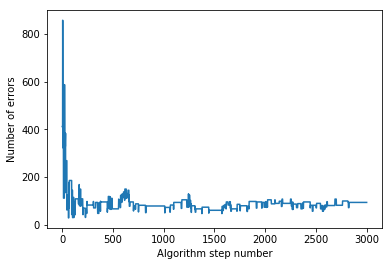

In [12]:
%matplotlib inline
perceptron_for_misclassification = create_perceptron(2)
errors_list = step_by_step_errors(perceptron_for_misclassification, input_matrix=data[:, :-1], y=data[:, -1][:,np.newaxis])
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");

First time I was afraid that something was going wrong, but this behaviour is expected. Cause the goal is to have better weights, not the number of well classified examples.

Ok, but the main question now: __how to see if the weights are always getting better?__<br>
For this, let's take the final weights our perceptron has converged and set these weights as reference weights and restart from zero our process again.

In [13]:
def get_vector(p):
    """возвращает вектор из всех весов перцептрона, включая смещение"""
    v = np.array(list(p.w.ravel()) + [p.b])
    return v

In [14]:
def step_by_step_distances(p, ideal, input_matrix, y, max_steps=1e6):
    """обучает перцептрон p и записывает каждое изменение расстояния от текущих весов до ideal"""
    distances = [norm(get_vector(p) - ideal)]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.train_on_single_example(example, answer)
            errors += error
            if error:
                distances.append(norm(get_vector(p) - ideal))
    return distances

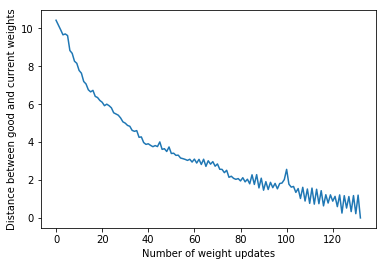

In [15]:
%matplotlib inline

np.random.seed(42)
init_weights = np.random.random_sample(3)
w, b = init_weights[:-1].reshape((2, 1)), init_weights[-1]
ideal_p = Perceptron(w.copy(), b.copy())
ideal_p.train_until_convergence(data[:, :-1], data[:, -1][:,np.newaxis])
ideal_weights = get_vector(ideal_p)

new_p = Perceptron(w.copy(), b.copy())
distances = step_by_step_distances(new_p, ideal_weights, data[:, :-1], data[:, -1][:,np.newaxis])

plt.xlabel("Number of weight updates")
plt.ylabel("Distance between good and current weights")
plt.plot(distances);

As you might have guessed by the way the straight line behaved in our animated picture below, the vector of weights is gradually approaching to good weights, but you can still note that the convergence is not actually perfect, we observe some jumps.

Approaching the vector of good weights, we are still following the rule: add good examples and substract bad ones.<br>
However, as we approach good weights, the error becomes smaller but we still continue to brutally add and substract the examples.<br>
Thus roughly adding good vectors, or roughly subtracting bad vectors, we significantly deviate from ours perfect weights. <br> This why the jumps appear.

# Logistic neuron & Gradient descent

The important thing that I did not mention earlier: our example data set was perfectly separated.<br>
But in real life, we could easily face an "unusual" apple or pear, for example an apple with shape and yellowness or pear, but it's actually an apple.<br> In statistic we call it __Outlier__. 

If we apply our previous perceptron to the data set with outliers, it will train endlessly as the data is no longer linearly separated.<br>
Of course, we could apply max_steps to exit the loop but if we remember the number of missclassified examples, we risk getting a bad classifier if we break the learning process earlier than necessary.

The logistic neuron based on __Gradient descent__ comes to our rescue.

In [16]:
## let's define some albegra functions

def sigmoid(x):
    """sigmoid function, works with both numbers and vectors (elementwise)"""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """derivative of a sigmoid function, works with both numbers and vectors (elementwise)"""
    return sigmoid(x) * (1 - sigmoid(x))

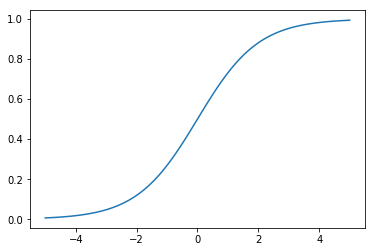

In [17]:
x=np.linspace(-5,5,100)
y = sigmoid(x)
plt.plot(x,y)

now I gonna to properly define __Neuron__ class

In [18]:
class Neuron:
    
    def __init__(self, weights, activation_function=sigmoid, activation_function_derivative=sigmoid_prime):
        """
        weights - of shape (m, 1), weights[0][0] - bias
        """
        
        assert weights.shape[1] == 1, "Incorrect weight shape"
        
        self.w = weights
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def neuron_answer(self, single_input):
        """
        One answer on given example.
        single_input of shape (m, 1) with first element = unity (for bias)
        Return: activation value
        """
        result = self.w.T.dot(single_input) 
        return self.activation_function(result)
    
    def summatory(self, input_matrix):
        """
        Summator function for all examples from input_matrix. 
        input_matrix (n, m), each line - specific example,
        n - # examples, m - # parameters.
        Return: vector (n, 1) with summator values for each example.
        """
        sumators = input_matrix.dot(self.w)
        return sumators
        
    
    def activation(self, summatory_activation):
        """Neuron activations for each example.
        summatory_activation - vector (n, 1), 
        Return: vector (n, 1)
        """
        activations = self.activation_function(summatory_activation)
        return activations 
    
    def neuron_answers(self, input_matrix): # all answers to matrix X
        """
        Answers to all examples.
        input_matrix - matrix (n, m), each line - example
        n - # examples, m - # parameters.
        Return: float vector (n, 1)
        """
        return self.activation(self.summatory(input_matrix))
        
    def SGD(self, X, y, batch_size, learning_rate=0.1, eps=1e-6, max_steps=200):
        """
        Main gradient descent algorithm.
        X - input matrix (n, m)
        y - correct answers (n, 1)
        
        learning_rate - const
        batch_size - размер батча, на основании которого 
        рассчитывается градиент и совершается один шаг алгоритма
        
        eps - 1st stopping criteria: diff in old vs new target function.
        Note: we could have also check the abs value of gradient. 
        
        max_steps - 2nd stopping criteria: # of weight updates > max_steps
        
        Return: 1 if 1st stop (descent converged), 0 if 2nd stop (reached time limit)
        """
        
        i=0
        while i < max_steps:
            i += 1
            # Это начало новой эры. тут ты бы мог делать перепаковки. батчи формируют так:
            # входные данные перемешиваются, после этого разбиваются на кусочки по batch_size штук в каждом. 
            # После того как все примеры хотя бы раз побывали в батче, данные перемешиваются снова
            
            self.update_mini_batch(X, y, learning_rate, eps)
    
    def update_mini_batch(self, X, y, learning_rate, eps):
        """
        stochastic gradient descent using subset of data (выскочить из ямки)
        X - input matrix (batch_size, m)
        y - correct answers (batch_size, 1)
        learning_rate - const
        eps - 1st stopping criteria: diff in old vs new target function.
        
        Compute gradient & update neuron's weights. If no target func perf return 1, else 0 (continue)
        """

        old_J = J_quadratic(self, X, y)
        gradient = compute_grad_analytically(self, X, y, J_prime=J_quadratic_derivative)
        self.w = self.w - learning_rate*gradient
        new_J = J_quadratic(self, X, y)
        if abs(old_J - new_J) < eps:
                return 1
        return 0
    
    def __repr__(self):
        return f'{self.__class__.__name__}(' f'{self.w})'

Let's define target function & co. as global functions.<br>
We can simply change it if we want.

In [19]:
def J_quadratic(neuron, X, y):
    """
    Target function. Loss function.
    X - input matrix (n, m)
    y - correct answers on X (n, 1)
    Return: scalar
    """
    assert y.shape[1] == 1, 'Incorrect y shape'  
    return 0.5 * np.mean((neuron.neuron_answers(X) - y) ** 2)

def J_quadratic_derivative(y, y_hat):
    """
    Compute vector of partial derivatives (1st gear in chain rule)
    y_hat - prediction vector (n,1)
    y - vector of correct answers (n,1)
    Returns vector (n, 1)
    """
    assert y_hat.shape == y.shape and y_hat.shape[1] == 1, 'Incorrect shapes'
    return (y_hat - y) / len(y) 
    

z - vector of summatory functions. Each
$ z[j] = \sum_{i} x_{i}^{(j)} w_i $ <br>
dz_dw - vector of derivatives from summatory func <br>
Each dz_dw$[j] = \frac{\partial}{\partial w_j} (\sum_{i} x_{i}^{(j)} w_i) = X_j^{(j)}$

In [20]:
def compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative):
    """
    Analytical derivative of target function.
    neuron - object of class Neuron
    X - vertical input matrix (n, m).
    y - correct answers on X
    J_prime - function считающая производные целевой функции по ответам
    
    Возвращает вектор размера (m, 1)
    """
    
    z = neuron.summatory(X)
    y_hat = neuron.activation(z)

    # derivative chain
    dy_dyhat = J_prime(y, y_hat)                          # 1st gear in chain
    dyhat_dz = neuron.activation_function_derivative(z)   # 2nd gear in chain
    dz_dw = X                                             # 3rd gear in chain

    grad = ((dy_dyhat * dyhat_dz).T).dot(dz_dw)    
    grad = grad.T
    return grad

Let's create some neuron and call just one time __update_mini_batch__

In [21]:
np.random.seed(42)
np.set_printoptions(suppress=True)
n = 10
m = 5

X = 20 * np.random.sample((n, m)) - 10
y = (np.random.random(n) < 0.5).astype(np.int)[:, np.newaxis]
w = 2 * np.random.random((m, 1)) - 1

neuron = Neuron(w)
neuron.update_mini_batch(X, y, 0.1, 1e-5)
print('neuron', neuron.w)

neuron [[-0.22368982]
 [-0.45599204]
 [ 0.65727411]
 [-0.28380677]
 [-0.43011026]]


Однако нам в голову пришла тревожная мысль.. А вдруг при расчёте градиента допущена ошибка?  

Как мы говорили в лекциях, неплохо бы проверить, правильно ли мы считаем градиенты, до того, как куда-то по этим градиентам спускаться. Зюк, например, долго пытался понять, как нам удалось сделать тот градиентный спуск, что мы показывали вам в лекции под саундтрек из "Секретных материалов". А мы всего-то забыли одну матрицу обратить, когда производную считали.

Сейчас мы проверим, правильно ли считаются производные целевой функции: мы реализуем подсчёт частных производных по определению, как $$\frac{\partial f}{\partial x_i} = \frac{f\left(x_1,\ldots,x_{i-1}, x_i + \Delta x, x_{i+1}, \ldots, x_d\right) - f\left(x_1,\ldots, x_d\right)}{\Delta x}.$$ Это не определение, в определении был бы $\lim _{\Delta x\to 0}$! Но если мы возьмём достаточно малое $\Delta x$, то приближение будет неплохим.

Иными словами, мы посчитаем целевую функцию, чуть-чуть поменяем какой-нибудь вес, после этого посчитаем целевую функцию еще раз, дальше применяем определение, то есть разделим разницу в целевой функции на изменение веса.

После этого можно будет сравнить результаты, полученные с помощью аналитического и численного метода: они не должны сильно отличаться.

Вы уже должны догадываться, почему мы не можем всегда обходиться только лишь численным нахождением производной, но пример, непосредственно это иллюстрирующий, появится на следующей неделе.

In [22]:
def compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Numerical derivative of any target function
    neuron - object of class Neuron
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений
    y - правильные ответы для тестовой выборки X
    J - целевая функция, градиент которой мы хотим получить
    eps - размер $\delta w$ (малого изменения весов)
    """

    initial_cost = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J(neuron, X, y) - initial_cost)/eps
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

Давайте посмотрим, что у нас получилось:

In [23]:
# Подготовим данные

X = data[:, :-1]
y = data[:, -1]

X = np.hstack((np.ones((len(y), 1)), X))
y = y.reshape((len(y), 1)) # Обратите внимание на эту очень противную и важную строчку


# Создадим нейрон

w = np.random.random((X.shape[1], 1))
neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

# Посчитаем пример
num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic)
an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)

print("Численный градиент: \n", num_grad)
print("Аналитический градиент: \n", an_grad)

Численный градиент: 
 [[ 0.0185396 ]
 [-0.00440454]
 [ 0.02620584]]
Аналитический градиент: 
 [[ 0.01712498]
 [-0.00550552]
 [ 0.02649715]]


"Вроде бы похоже", но это не очень удовлетворительный ответ. Давайте посмотрим, как меняется наше приближение в зависимости от $\varepsilon$. Посчитаем для разных $\varepsilon$ модуль разности этих двух градиентов.

In [24]:
def print_grad_diff(eps):
    num_grad = compute_grad_numerically(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))
    
interact(print_grad_diff, 
            eps=RadioButtons(options=["3", "1", "0.1", "0.001", "0.0001"]), separator=" ");

0.016859521446397477


Неплохо, но можно лучше, причем с минимумом усилий.
Давайте вместо того, чтобы считать $\frac{f(x) - f(x + \Delta x)}{\Delta x}$, посмотрим на $\frac{f(x  + \Delta x) - f(x - \Delta x)}{2 \Delta x}$, то есть шагнём в обе стороны. Говорят, что на практике этот метод работает лучше.

Реализуйте функцию compute_grad_numerically_2, чтобы проверить, слухи это или нет.

In [25]:
def compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=10e-2):
    """
    Численная производная целевой функции.
    neuron - объект класса Neuron с вертикальным вектором весов w,
    X - вертикальная матрица входов формы (n, m), на которой считается сумма квадратов отклонений,
    y - правильные ответы для тестовой выборки X,
    J - целевая функция, градиент которой мы хотим получить,
    eps - размер $\delta w$ (малого изменения весов).
    """
    
    ref_val = J(neuron, X, y)
    w_0 = neuron.w
    num_grad = np.zeros(w_0.shape)
    
    for i in range(len(w_0)):
        
        old_wi = neuron.w[i].copy()
        # Меняем вес
        neuron.w[i] += eps
        J_up = J(neuron, X, y)
        neuron.w[i] = old_wi - eps
        J_down = J(neuron, X, y)
        
        # Считаем новое значение целевой функции и вычисляем приближенное значение градиента
        num_grad[i] = (J_up - J_down)/(2*eps)
        
        # Возвращаем вес обратно. Лучше так, чем -= eps, чтобы не накапливать ошибки округления
        neuron.w[i] = old_wi
            
    # проверим, что не испортили нейрону веса своими манипуляциями
    assert np.allclose(neuron.w, w_0), "МЫ ИСПОРТИЛИ НЕЙРОНУ ВЕСА"
    return num_grad

Давайте посмотрим, к какому результату привели ваши эксперименты:

In [26]:
def print_grad_diff_2(eps):
    num_grad = compute_grad_numerically_2(neuron, X, y, J=J_quadratic, eps=float(eps))
    an_grad = compute_grad_analytically(neuron, X, y, J_prime=J_quadratic_derivative)
    print(np.linalg.norm(num_grad-an_grad))
    
interact(print_grad_diff_2, 
            eps=RadioButtons(options=["3", "1", "0.1", "0.001", "0.0001"]), separator=" ");

0.027004904390753443


Перед нами тот редкий случай, когда фраза **"на порядок лучше"** - очевидное преуменьшение!

## Визуализация

Мы сидели, уставшие, но довольные проделанной работой, как вдруг Зюк оживлённо воскликнул:

-- У нас ведь всего два входа! 

-- И что? - удивлённо спросили мы. 

-- А то, что если мы зафиксируем значение смещения, то можем полноценно визуализировать целевую функцию. Неужели вам не хочется посмотреть, как она выглядит в этой задачке? А еще.. А еще давайте добавим возможность перемешивать и сдвигать данные! Как вам такая идея?

Не дождавшись ответа, Зюк начал программировать. Он выглядел очень возбуждённым.

In [27]:
def J_by_weights(weights, X, y, bias):
    """
    Посчитать значение целевой функции для нейрона с заданными весами.
    Только для визуализации
    """
    new_w = np.hstack((bias, weights)).reshape((3,1))
    return J_quadratic(Neuron(new_w), X, y)

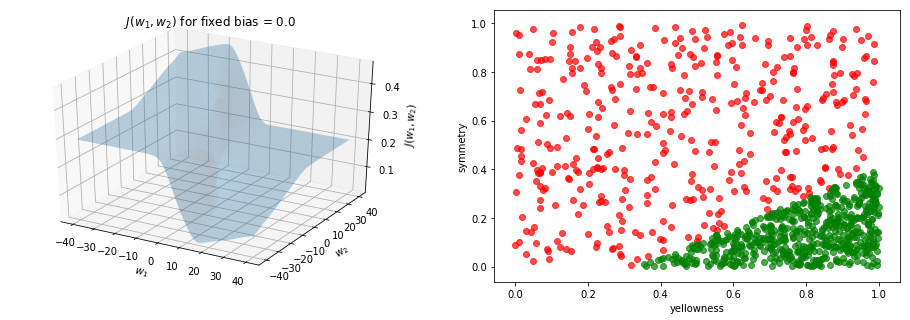

In [28]:
%matplotlib inline

max_b = 40
min_b = -40
max_w1 = 40
min_w1 = -40
max_w2 = 40
min_w2 = -40

g_bias = 0 # график номер 2 будет при первой генерации по умолчанию иметь то значение b, которое выставлено в первом
X_corrupted = X.copy()
y_corrupted = y.copy()

@interact(fixed_bias=FloatSlider(min=min_b, max=max_b, continuous_update=False), 
          mixing=FloatSlider(min=0, max=1, continuous_update=False, value=0),
          shifting=FloatSlider(min=0, max=1, continuous_update=False, value=0)
            )
def visualize_cost_function(fixed_bias, mixing, shifting):
    """
    Визуализируем поверхность целевой функции на (опционально) подпорченных данных и сами данные.
    Портим данные мы следующим образом: сдвигаем категории навстречу друг другу, на величину, равную shifting 
    Кроме того, меняем классы некоторых случайно выбранных примеров на противоположнее.
    Доля таких примеров задаётся переменной mixing
    
    Нам нужно зафиксировать bias на определённом значении, чтобы мы могли что-нибудь визуализировать.
    Можно посмотреть, как bias влияет на форму целевой функции
    """
    xlim = (min_w1, max_w1)
    ylim = (min_w2, max_w2)
    xx = np.linspace(*xlim, num=101)
    yy = np.linspace(*ylim, num=101)
    xx, yy = np.meshgrid(xx, yy)
    points = np.stack([xx, yy], axis=2)
    
    # не будем портить исходные данные, будем портить их копию
    corrupted = data.copy()
    
    # инвертируем ответы для случайно выбранного поднабора данных
    mixed_subset = np.random.choice(range(len(corrupted)), int(mixing * len(corrupted)), replace=False)
    corrupted[mixed_subset, -1] = np.logical_not(corrupted[mixed_subset, -1])
    
    # сдвинем все груши (внизу справа) на shifting наверх и влево
    pears = corrupted[:, 2] == 1
    apples = np.logical_not(pears)
    corrupted[pears, 0] -= shifting
    corrupted[pears, 1] += shifting
    
    # вытащим наружу испорченные данные
    global X_corrupted, y_corrupted
    X_corrupted = np.hstack((np.ones((len(corrupted),1)), corrupted[:, :-1]))
    y_corrupted = corrupted[:, -1].reshape((len(corrupted), 1))
    
    # посчитаем значения целевой функции на наших новых данных
    calculate_weights = partial(J_by_weights, X=X_corrupted, y=y_corrupted, bias=fixed_bias)
    J_values = np.apply_along_axis(calculate_weights, -1, points)
    
    fig = plt.figure(figsize=(16,5))
    # сначала 3D-график целевой функции
    ax_1 = fig.add_subplot(1, 2, 1, projection='3d')
    surf = ax_1.plot_surface(xx, yy, J_values, alpha=0.3)
    ax_1.set_xlabel("$w_1$")
    ax_1.set_ylabel("$w_2$")
    ax_1.set_zlabel("$J(w_1, w_2)$")
    ax_1.set_title("$J(w_1, w_2)$ for fixed bias = ${}$".format(fixed_bias))
    # потом плоский поточечный график повреждённых данных
    ax_2 = fig.add_subplot(1, 2, 2)
    plt.scatter(corrupted[apples][:, 0], corrupted[apples][:, 1], color = "red", alpha=0.7)
    plt.scatter(corrupted[pears][:, 0], corrupted[pears][:, 1], color = "green", alpha=0.7)
    ax_2.set_xlabel("yellowness")
    ax_2.set_ylabel("symmetry")

    plt.show()

Мы с интересом рассматривали результат. По форме функции становилось понятно, что градиентный спуск будет обычно попадать в ловушку. На графике видна огромная яма, прижимающаяся своим дном к нулю. 

Это происходит от того, что данные линейно разделимы, и мы всегда можем увеличить хорошие веса, получив еще более хорошие (подумайте, почему это так).

Ник: итак важно напомнить что мы закодировали грушы 1, аблоки 0. Сигмоида нам должна дать ответ в раене (0 , 1) где ближе к нулю - скорее всего яблоко, ближе к единице - груша. Если вспомнить график сигмоиды то для положительных чисел ответ будет скорее груша, для всех отрицательных - яблоко. Если мы уже хорошие веса, то их увеличивая их, наша сумматорваня функция все больше отдаляется от нуля, тем самым превращаясь в подобие индикатора. Таким образом (1-1)^2 лучше чем (0.91 - 1)^2 

Еще страшнее выглядят плоские участки. Как вы думаете, застрянем мы не них или нет?

Следующим графиком Зюк особенно нас порадовал. Можно было выбрать точку и bias, откуда мы хотим начать градиентный спуск, после чего его программа генерировала "историю обучения" (learning curve) - график значений целевой функции после очередного обновления весов. 

Смотря на поверхность целевой функции мы старались предсказать, к каким весам мы придём, если начнём спуск с той или иной точки. Оказалось что всё не так очевидно, как мы думали.

На графике ниже видно, что при "хорошем" раскладе (мы попали в большую яму) значение целевой функции всё время уменьшалось (хоть и по чуть-чуть), пока мы не достигали порога по количеству итераций. При плохом мы могли просто застрять в локальном минимуме или выйти на плато. 

\\\\ Как можно бороться с подобными ловушками мы поговорим на третьей и четвёртой неделях.

***Если в предыдущем задании вы "подпортили" данные - график будет строиться именно для подпорченных =)***

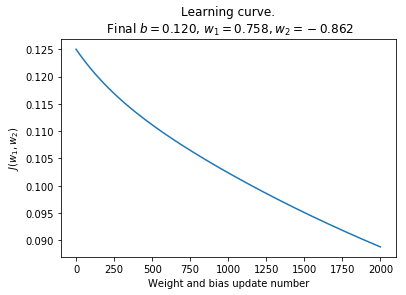

In [29]:
@interact(b=BoundedFloatText(value=str(g_bias), min=min_b, max=max_b, description="Enter $b$:"),
          w1=BoundedFloatText(value="0", min=min_w1, max=max_w1, description="Enter $w_1$:"),
          w2=BoundedFloatText(value="0", min=min_w2, max=max_w2, description="Enter $w_2$:"),
          learning_rate=Dropdown(options=["0.01", "0.05", "0.1", "0.5", "1", "5", "10"], 
                                value="0.01", description="Learning rate: ")
         )
def learning_curve_for_starting_point(b, w1, w2, learning_rate=0.1):
    w = np.array([b, w1, w2]).reshape(X_corrupted.shape[1], 1)
    learning_rate=float(learning_rate)
    neuron = Neuron(w, activation_function=sigmoid, activation_function_derivative=sigmoid_prime)

    story = [J_quadratic(neuron, X_corrupted, y_corrupted)]
    for _ in range(2000):
        neuron.SGD(X_corrupted, y_corrupted, 2, learning_rate=learning_rate, max_steps=2)
        story.append(J_quadratic(neuron, X_corrupted, y_corrupted))
    plt.plot(story)
    
    plt.title("Learning curve.\n Final $b={0:.3f}$, $w_1={1:.3f}, w_2={2:.3f}$".format(*neuron.w.ravel()))
    plt.ylabel("$J(w_1, w_2)$")
    plt.xlabel("Weight and bias update number")
    plt.show()

Близился вечер, и мы решили, что на сегодня уже утолили жажду программирования и познания. 
Даже Зюк выглядел немного утомлённым, насколько можно было судить по его инопланетной мимике.
Он пообещал, что в следующий раз мы сможем сделать настоящую нейросеть, и мы отправились спать,
думая о предстоящей встрече.

Однако, не все. Кто-то из наших так увлёкся, что уже сейчас, не дожидаясь следующей встречи, отправился заменять целевые и активационные функции нейронов, наблюдая, как это отразится на результатах.
